# Import

In [1]:
from exofile.archive import ExoFile

# Load the exofile
(The warning about the custom file is not worrysome, since there is no custom file yet)

In [2]:
data = ExoFile.load()

/home/vandal/astro/exofile/exofile/archive.py:448: GetLocalFileWarning: DID NOT READ CUSTOM FILE. FileNotFoundError has occur when trying to query/read custom file.
  warn(GetLocalFileWarning(file="custom file", err=e))


# Acces columns
(see column's names from the [Confirmed Planet Table](https://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html))

In [3]:
data['pl_name', 'pl_eqt', 'pl_orbper', 'pl_trandur']

pl_name,pl_eqt,pl_orbper,pl_trandur
,K,d,d
str29,int64,float64,float64
11 Com b,--,326.03,--
11 UMi b,--,516.21997,--
14 And b,--,185.84,--
14 Her b,--,1773.40002,--
16 Cyg B b,--,798.5,--
18 Del b,--,993.3,--
1RXS J160929.1-210524 b,1700,--,--
24 Boo b,--,30.3506,--


### Choose only some planets
(can auto-complete, case sensitive)

In [4]:
data.by_pl_name('HD 189', 'WASP-33 b', 'KELT-9 b')['pl_name', 'pl_eqt', 'pl_orbper', 'pl_trandur']

pl_name,pl_eqt,pl_orbper,pl_trandur
,K,d,d
str29,int64,float64,float64
HD 189733 b,1209,2.21857567,0.075152
WASP-33 b,2782,1.21987,0.1189
KELT-9 b,4050,1.4811235,0.16316


## Find reference

In [5]:
ref = ExoFile.load_ref()

/home/vandal/astro/exofile/exofile/archive.py:512: GetLocalFileWarning: DID NOT READ CUSTOM FILE. FileNotFoundError has occur when trying to query/read custom file.
  warn(GetLocalFileWarning(file="custom file", err=e))


In [6]:
ref.by_pl_name('HD 189')['pl_eqt']

Addison et al. 2019


# Define custom values on your computer
It is recommended to keep a file with your preferred values. It can be a simple .csv file that you can simply edit with excel. If you do so, make sure the column names and the units are the same as the NASA exoplanet archive.

In [7]:
from exofile.config import edit_param  # To edit

from exofile.config import Param  # To show the current parameters
from exofile.config import reset_param  # To reset parameters

## 1. Specify the path to your custom table
- A good practice is to keep a dedicated directory for the custom file, so it will always be loaded by `ExoFile.load()` wherever you are in your computer.
### You need to modify the default parameters of the code (only once):
Note that I'm using a .csv file so it's easier to edit with excel or numbers. However, you might need to specify the delimiter when loading (in my case, excel saves a .csv with ";" and not ","): `ExoFile.load(delimiter=";")`. You might also need to specify the encoding, for example: `ExoFile.load(encoding='utf-8-sig')`. All the keywords used by `astropy.table.Table.read()` can be passed to `ExoFile.load()` to read the custom file.

In [8]:
# Edit the path to your local values
from pathlib import Path
PATH_TO_EXOFILE_DIR = Path(".")
edit_param(custom_file=PATH_TO_EXOFILE_DIR / 'exofile_custom.csv')

# Show all the default parameters. You can see the modified 'custom_file' key
Param.load()

!!python/object/apply:collections.OrderedDict
- - - sheet_key
    - Description: string, Key of the google sheet with custom values
      Value: 14Trm-AQ2eOphfwqJYrevnDrNVk56E-aH8yvRHQLjzWg
  - - url
    - Description: string, Where to find the exofile (still named masterfile) (url)
      Value: https://www.astro.umontreal.ca/~adb/masterfile.ecsv
  - - url_ref
    - Description: string, Where to find the exofiles references (url)
      Value: https://www.astro.umontreal.ca/~adb/reference_file.ecsv
  - - custom_file
    - Description: string, Local file with custom values. Will be used to complement
        the online exofile
      Value: !!python/object/apply:pathlib.PosixPath
      - exofile_custom.csv
  - - exofile
    - Description: string, Local exofile to use offline.
      Value: exofile.ecsv
  - - ref_file
    - Description: string, Local exofile references to use offline.
      Value: exofile_ref.ecsv

In [9]:
# Not satisfied? Run reset_param() to go back to default parameters
reset_param()
Param.load()['custom_file']  # Show modification

{'Value': 'exofile_custom.ecsv',
 'Description': 'string, Local file with custom values. Will be used to complement the online exofile'}

## 2. If the table exists, you're done! It will read it when using `ExoFile.load()`. Now, if you want to create the file, you can do it with excel and create a .csv or you can do it in a code with the ExoFile as follow.

In [10]:
# Better to use masked column
from exofile.table_custom import MaskedColumn
custom = ExoFile(masked=True)

# Define columns
custom.add_column(MaskedColumn(name='pl_name', dtype='U30'))
custom.add_column(MaskedColumn(name='pl_eqt'))
custom.add_column(MaskedColumn(name='pl_trandur', unit='h'))

# Add custom values
custom.add_row({'pl_name':'HD 189733 b', 'pl_eqt':3000.})
custom.add_row({'pl_name':'NewSecretPlanet b', 'pl_trandur':3.21, 'pl_eqt':2156})

# Re-mask the table since add_row deals weirdly with masks
custom = ExoFile(custom, masked=True)
custom

pl_name,pl_eqt,pl_trandur
,,h
str30,float64,float64
HD 189733 b,3000.0,--
NewSecretPlanet b,2156.0,3.21


In [11]:
# Save the table to default custom table.
custom.write_to_custom()

Note that the default custom file is a .ecsv. It has the advantage to save the units. However, excel does not support it, so you would always need to edit it with a code like above.

### We can test if the modification worked

In [12]:
data = ExoFile.load()

In [13]:
data.by_pl_name('HD 189', 'NewSecret')['pl_name','pl_eqt','pl_trandur']

pl_name,pl_eqt,pl_trandur
,K,d
str29,int64,float64
HD 189733 b,3000,0.075152
NewSecretPlanet b,2156,0.13374999999999998


Note that __pl_trandur__ column has been convert to days to match _exofile.ecsv_ units

### The reference for these values will automatically change

In [14]:
ref = ExoFile.load_ref()
ref.by_pl_name('HD 189', 'NewSecret')['pl_name','pl_eqt','pl_trandur']

pl_name,pl_eqt,pl_trandur
str29,str42,str34
HD 189733 b,custom ref,Baluev et al. 2015
NewSecretPlanet b,custom ref,custom ref


# Keep a version of the exofile on your computer

Usefull to be able to work offline, or save a subsample of the exofile to be quicker to use
### WARNING: Remember to NOT edit the exofile direclty, use custom_table instead.

## 1. Save the complete _exofile.ecsv_ in a dedicated folder
(so that `ExoFile.load()` will work offline)
- Again, a good practice is to keep this safety _exofile.ecsv_ in the aforementioned dedicated directory (could be the same as the custom_file), so it will always be loaded by `ExoFile.load()` by default.

### a) Save a version of the exofile
(Only this step needs an internet connection)

In [15]:
# Save a version
data = ExoFile.load()
data.write(PATH_TO_EXOFILE_DIR / 'exofile.ecsv')

### b) Specify the path of your local exofile

In [16]:
# Edit the path to your local exofile
edit_param(exofile=PATH_TO_EXOFILE_DIR / 'exofile.ecsv')

### c) Load the exofile offline 
NOTE: the `query=False` is not necessary here if you're working offline. `ExoFile.load()` will automatically reach for the local default exofile if the query is not working.

In [17]:
# Read a local version:
data = ExoFile.load(query=False)

### Note that the same steps could be done but for the reference file.

In [18]:
# Save a version
data = ExoFile.load_ref()
data.write(PATH_TO_EXOFILE_DIR / 'exofile_ref.ecsv')

# Edit the path to your local exofile
edit_param(ref_file=PATH_TO_EXOFILE_DIR / 'exofile_ref.ecsv')

# Read a local version:
data = ExoFile.load_ref(query=False)

## 2. Save a subsample of _exofile.ecsv_ in your code directory
(so that `ExoFile.load()` will be quicker)
- In this case, we don't want to edit the parameters of the `exofile` code since it's specific to a routine.

### a) Save a version of the exofile
(Only this step needs a connection)

In [19]:
# Save a version (in this example I only need 3 exoplanets)
sub_sample = ExoFile.load().by_pl_name('HD 189','WASP-33', 'HD 209458')

In [20]:
# Write in the directory where you run your routine
PATH_TO_ROUTINE = Path(".")
sub_sample.write(PATH_TO_ROUTINE / 'sub_sample_exofile.ecsv')

### b) Specify the path of your local exofile only when loading it
NOTES: 
- `query=False` is necessary here since otherwise, `ExoFile.load()` will only reach for the local exofile if the query doesn't work.
- I assume the following line of code is called from your routine directory: `"/path/to/your/routine/"`

In [21]:
# Read a local version:
data = ExoFile.load(query=False, exofile='sub_sample_exofile.ecsv')

/home/vandal/astro/exofile/exofile/archive.py:448: GetLocalFileWarning: DID NOT READ CUSTOM FILE. TypeError has occur when trying to query/read custom file.
  warn(GetLocalFileWarning(file="custom file", err=e))


###  Again, the same steps could be done but for the reference file.

# Other considerations
## Using in a code
- __Local version__: It is good practice to keep a version of _exofile.ecsv_ on your computer (as show in the previous section). This way, `ExoFile.load()` will work offline without changing anything. The values won't necessary be up to date (since you have to download a version yourself), but you won't get an error, even without specifying `query=False`.
 - I recommend that you save this _exofile.ecsv_ in a dedicated folder and give the full path to `edit_param(exofile="/yourPATH_TO_EXOFILE_DIR/exofile.ecsv")`
- __Custom table__: I recommend that you put your custom values in the aforementioned dedicated folder and give the full path to `edit_param(custom_file="/yourPATH_TO_EXOFILE_DIR/exofile_custom.csv")`. This way, wherever you call `ExoFile.load()`, the custom values will be added to the output table.
- __Reduced *exofile.ecsv*__: To speed-up a code where you need only a subsample of exoplanets' informations, I recommend that you save a version of _sub_sample_exofile.ecsv_ in the directory your code is working and specify the name of the file when calling `ExoFile.load(exofile="sub_sample_exofile.ecsv", query=False)` instead of editing the parameters of the `exofile` code.
- __Dealing with astropy Table__: The exofile is a astropy table, which is useful to store data, but not to do calculations. In my opinion, it is better to convert the data you need with the desired units to an array to use it in a code. See the next lines of code for an example.

In [22]:
# Example: Get all available equilibrium temperatures
# and make sure it is in Kelvins
data['pl_eqt'].to_array(units='K')

masked_array(data=[--, --, --, ..., --, --, 2156.0],
             mask=[ True,  True,  True, ...,  True,  True, False],
       fill_value=1e+20)

In [23]:
# The method returns a masked array.
# If you prefer to use Nans:
from numpy import nan
eqt = data['pl_eqt'].to_array(units='K')
eqt = eqt.filled(fill_value=nan)
eqt

array([  nan,   nan,   nan, ...,   nan,   nan, 2156.])

*Everything you need to understand on how to use the exofile is above.* <br>*The next part of the notebook is just supplementary example of what you could do.*
-------

# Bonus utilities
## Accessing tables from NASA exoplanet archive
The confirmed planet table and the extended planet table can be queried with the exofile code.
### Example with the extended table (Usefull to get all references from a specific target)

_NOTE: As of February 2022, the following is broken because the Extended Archive table has been removed from the NASA archive._

In [24]:
from exofile.archive import ExtendedArchive

In [25]:
# Query the whole archive, so can take some time
extend = ExtendedArchive.query()

InconsistentTableError: 
ERROR: Unable to guess table format with the guesses listed below:
Reader:Ecsv fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FixedWidthTwoLine fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:RST fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastBasic fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Basic fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastRdb fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Rdb fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastTab fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Tab fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Cds fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Mrt fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Daophot fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:SExtractor fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Ipac fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Latex fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:AASTex fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastCommentedHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic fast_reader: {'enable': True} fill_values: [('', '0')]

************************************************************************
** ERROR: Unable to guess table format with the guesses listed above. **
**                                                                    **
** To figure out why the table did not read, use guess=False and      **
** fast_reader=False, along with any appropriate arguments to read(). **
** In particular specify the format and any known attributes like the **
** delimiter.                                                         **
************************************************************************

In [26]:
# Change the columns name to get the same as the normal planet table
extend.ch_col_names()

NameError: name 'extend' is not defined

In [27]:
# Get index of a planet in the table
index = extend['pl_name'].find('HD 189')[0]
extend[index]['pl_name', 'pl_orbper', 'mpl_reflink']

NameError: name 'extend' is not defined

# Other examples

## Search exoplanets confirmed by TESS

In [28]:
index = data['pl_facility'].find('TESS')[0]
tess_data = data[index]
tess_data['pl_name', 'pl_facility', 'pl_trandur', 'pl_massj', 'pl_eqt','st_j']

pl_name,pl_facility,pl_trandur,pl_massj,pl_eqt,st_j
,,d,jupiterMass,K,mag
str29,str44,float64,float64,int64,float64
AU Mic b,Transiting Exoplanet Survey Satellite (TESS),0.1458333,--,--,5.436
DS Tuc A b,Transiting Exoplanet Survey Satellite (TESS),0.13235,--,--,7.122
GJ 1252 b,Transiting Exoplanet Survey Satellite (TESS),0.0305833,0.00658,1089,8.697
GJ 143 b,Transiting Exoplanet Survey Satellite (TESS),0.1345833,0.07142,422,6.081
GJ 3473 b,Transiting Exoplanet Survey Satellite (TESS),0.0395833,0.00585,773,9.627
GJ 357 b,Transiting Exoplanet Survey Satellite (TESS),0.06375,0.00579,525,7.337
HD 108236 b,Transiting Exoplanet Survey Satellite (TESS),0.0993333,--,1099,8.046
HD 108236 c,Transiting Exoplanet Survey Satellite (TESS),0.1191667,--,932,8.046


### Use it to compute some quantities
#### Relative flux at 1.25 microns (J-band central wavelength) assuming blackbody radiation

In [29]:
import astropy.units as u
from astropy.modeling.models import BlackBody
from numpy import isfinite, where
import matplotlib.pyplot as plt

In [30]:
T_pl = tess_data['pl_eqt'].quantity
T_star = tess_data['st_teff'].quantity
R_pl = tess_data['pl_radj'].quantity
R_st = tess_data['st_rad'].quantity
T_pl

<Quantity [   0,    0, 1089,  422,  773,  525, 1099,  932,  708,  636,
              0, 1371, 1228, 1001,  642,  769,  812,  552,  499, 2132,
           2128,  701, 1073,    0,    0,    0, 2061,  876,    0,    0,
           1311, 1411, 1174, 1572, 1326, 1075,  965,  610,  517,  409,
            617,  805,  700,  650,  370,  433,  892,  353, 1978,  435,
              0,  810,  637,    0,  754, 1037,  828,  638,  413,  344,
           1395, 1679,    0,  918, 1405, 1588, 1619, 1669, 1715, 1198,
            767, 1040,  873,  690,  600,  470,  362,  759,  497,  628,
              0,    0,  528,  424,  340,  981,  674, 1491,  875,  722,
           1370,  760,  611, 2480,  860,    0,    0,  750, 1714, 1586,
           1749, 1252,  417,  356,  269, 1038,  800,  514,  415,  610,
           1253,    0,    0, 1397, 1192,    0,    0, 1526,    0,    0,
            163, 1170] K>

In [31]:
bb_pl = BlackBody(temperature=T_pl)
bb_star = BlackBody(temperature=T_star)
F_pl = bb_pl(1.25 * u.micron)
F_star = bb_star(1.25 * u.micron)

/home/vandal/astro/exofile/venv/lib64/python3.10/site-packages/astropy/units/quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [32]:
ratio = F_pl/F_star * (R_pl/R_st)**2
ratio.unit

/home/vandal/astro/exofile/venv/lib64/python3.10/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Unit("jupiterRad2 / solRad2")

In [33]:
ratio = ratio.decompose()
ratio.unit

Unit(dimensionless)

/home/vandal/astro/exofile/venv/lib64/python3.10/site-packages/matplotlib/text.py:830: UserWarning: Warning: converting a masked element to nan.
  x = float(self.convert_xunits(self._x))
/home/vandal/astro/exofile/venv/lib64/python3.10/site-packages/matplotlib/text.py:690: UserWarning: Warning: converting a masked element to nan.
  posx = float(self.convert_xunits(self._x))
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


-- 8.989441578369101e-05 HD 202772 A b
8.825 0.0001503175207900052 HD 2685 b
8.922 0.00027135507196673485 HIP 65 A b
8.446 4.502097158619129e-05 LTT 9779 b
8.485 3.067046338454575e-05 TOI-1333 b
10.324 1.0420547567824628e-05 TOI-150.01
11.371 6.734298652021508e-05 TOI-157 b
9.505 1.638214875692783e-05 TOI-1601 b
10.404 4.251768531917768e-05 TOI-163 b
11.181 5.5455189684329594e-05 TOI-169 b
8.879 1.6643444459280137e-05 TOI-561 b
10.044 7.515415449639074e-05 TOI-564 b
9.17 2.4738432354209725e-05 TOI-628 b
9.519 5.250947118853418e-05 TOI-640 b
15.677 inf WD 1856+534 b


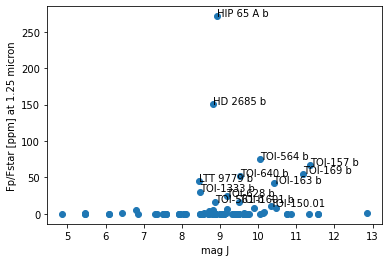

In [34]:
mask = (ratio == 0) | (~isfinite(ratio)) 
plt.plot(tess_data['st_j'][~mask], ratio[~mask]*1e6, 'o')

itext = where(ratio > 10 * 1e-6)[0]
for i in itext:
    print(tess_data['st_j'][i],ratio[i], tess_data['pl_name'][i])
    plt.text(tess_data['st_j'][i], ratio[i]*1e6, tess_data['pl_name'][i])

plt.ylabel('Fp/Fstar [ppm] at 1.25 micron')
_ = plt.xlabel('mag J')

## Edit columns or values
See https://docs.astropy.org/en/stable/table/modify_table.html

### Change units

In [35]:
test_table = ExoFile(tess_data.copy(), masked=True, copy=False)

In [36]:
# You cannot change the units like that
new_data = test_table['pl_trandur'].to('h')
mask = test_table['pl_trandur'].mask
test_table['pl_trandur'] = new_data
test_table['pl_trandur'].mask = mask

In [37]:
test_table['pl_trandur']

3.4999992
3.1764
0.7339992
3.2299992
0.9499992
1.53
2.3839992
2.8600008
3.8500008
4.199999999999999
2.91


In [38]:
tess_data['pl_trandur']

0.1458333
0.13235
0.0305833
0.1345833
0.0395833
0.06375
0.0993333
0.1191667
0.1604167
0.175
0.12125


# Plan transit observations with astroplan

In [39]:
from astropy.time import Time
import warnings
from astropy.utils.exceptions import AstropyUserWarning
from astropy.coordinates import SkyCoord
from astropy.table import Table
# Import astroplan tools and constraints
# Other constraints are available
from astroplan import (FixedTarget, Observer, EclipsingSystem,
                       is_event_observable, AtNightConstraint,
                       TimeConstraint, AirmassConstraint)

In [40]:
# Keep only target with transit duration
missing = tess_data['pl_trandur'].mask
transit_data = tess_data[~missing]
transit_data['pl_name', 'pl_tranmid', 'pl_trandur', 'pl_orbper'].show_in_notebook()

idx,pl_name,pl_tranmid,pl_trandur,pl_orbper
,,d,d,d
0,AU Mic b,2458330.39153,0.1458333,8.46321
1,DS Tuc A b,2458332.30997,0.13235,8.138268
2,GJ 1252 b,2458668.09739,0.0305833,0.5182349
3,GJ 143 b,2458385.92502,0.1345833,35.61253
4,GJ 3473 b,2458492.20408,0.0395833,1.1980035
5,GJ 357 b,2458517.99862,0.06375,3.93072
6,HD 108236 b,2458773.2964,0.0993333,3.795963
7,HD 108236 c,2458770.90586,0.1191667,6.203449
8,HD 108236 d,2458769.79682,0.1604167,14.175685


In [41]:
epoch = Time(transit_data['pl_tranmid'], format='jd')
period = transit_data['pl_orbper'].quantity
transit_duration = transit_data['pl_trandur'].quantity

### Constraints

In [42]:
# 2020A semester at cfht
t1, t2 = Time(['2020-02-01 00:00', '2020-07-31 00:00'])
site = 'cfht'

# See astroplan available constraints
constraints = [AtNightConstraint.twilight_nautical(),
               AirmassConstraint(max=3.),
               TimeConstraint(t1, t2)
              ]

### Compute next transits

In [43]:
obs = Observer.at_site(site)

ra_unit = transit_data['ra'].unit
dec_unit = transit_data['dec'].unit

for itar, row in enumerate(transit_data):

    # -------------------------
    # Steps to predict transits
    # -------------------------

    ra = row['ra'] * ra_unit
    dec = row['dec'] * dec_unit
    coord = SkyCoord(ra=ra, dec=dec)
    target = FixedTarget(coord=coord, name=row['pl_name'])

    # Define system
    sys = EclipsingSystem(primary_eclipse_time=epoch[itar],
                          orbital_period=period[itar],
                          duration=transit_duration[itar],
                          name=target.name
                         )
    
    # Predict 'n' next transits
    with warnings.catch_warnings(record=True) as w:
        
        # Compute transits
        t_mid = sys.next_primary_eclipse_time(t1, n_eclipses=1000)
        
    # Check if last event after time limit
    if t_mid[-1] < t2:
        warnings.warn('end time ('+t2.value +
                      ') is passed the last computed event time (' +
                      t_mid[-1].value+')\n' +
                     '\t You can change the n_eclipse kwarg ' +
                     'value or choose a different window (start or end time)',
                     AstropyUserWarning
                    )
        
    # Catch warnings
    with warnings.catch_warnings(record=True) as w:
        
        # Compute transit start/end (t1, t4)
        t1_t4 = sys.next_primary_ingress_egress_time(t1, n_eclipses=1000)

        # Compute observable events
        index = is_event_observable(constraints, obs, target,
                                    times_ingress_egress=t1_t4).squeeze()
        
    # -------------------
    # End of steps to predict transits
    # -------------------
        
    # Print result
    if index.any():
        out = Table([t_mid[index].iso, *t1_t4[index].T.iso],
                    names=['Mid transit', 'ingress', 'egress'],meta={'pl_name':target.name})
        break
    else:
        print('no event found for ', target.name)

no event found for  AU Mic b
no event found for  DS Tuc A b
no event found for  GJ 1252 b
no event found for  GJ 143 b


In [44]:
out

Mid transit,ingress,egress
str23,str23,str23
2020-02-03 06:04:38.294,2020-02-03 05:36:08.296,2020-03-23 09:23:15.891
2020-02-04 10:49:45.797,2020-02-03 06:33:08.293,2020-03-29 08:11:53.406
2020-02-09 05:50:15.806,2020-02-04 10:21:15.798,2020-03-29 09:08:53.403
2020-02-10 10:35:23.309,2020-02-04 11:18:15.795,2020-04-04 07:57:30.918
2020-02-16 10:21:00.821,2020-02-09 05:21:45.808,2020-04-04 08:54:30.915
2020-02-22 10:06:38.333,2020-02-09 06:18:45.805,2020-04-10 07:43:08.430
2020-02-28 09:52:15.845,2020-02-10 10:06:53.310,2020-04-10 08:40:08.427
2020-03-05 09:37:53.357,2020-02-10 11:03:53.307,2020-04-16 07:28:45.942
2020-03-11 09:23:30.869,2020-02-16 09:52:30.822,2020-04-16 08:25:45.939
